# STAT3612 - Group project

### Interpretable Machine Learning with HELOC data
- Nyeongmin Lee (3035401370)
- (the other member dropped the course)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("HelocData.csv", na_values = [-7, -8, -9])
df.head(10)

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,Bad,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,Good,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,Good,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,Bad,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0
5,Bad,74.0,193.0,1.0,91.0,19.0,0.0,0.0,100.0,NaN,...,18.0,NaN,1.0,1.0,90.0,79.0,6.0,2.0,4.0,73.0
6,Bad,58.0,247.0,2.0,62.0,30.0,0.0,0.0,94.0,1.0,...,34.0,9.0,0.0,0.0,62.0,70.0,5.0,2.0,2.0,89.0
7,Good,89.0,203.0,6.0,79.0,28.0,0.0,0.0,97.0,62.0,...,53.0,20.0,0.0,0.0,8.0,90.0,1.0,2.0,0.0,33.0
8,Good,89.0,357.0,1.0,125.0,15.0,0.0,0.0,100.0,NaN,...,39.0,NaN,1.0,0.0,6.0,31.0,4.0,2.0,0.0,55.0
9,Bad,63.0,240.0,4.0,64.0,20.0,1.0,0.0,86.0,45.0,...,10.0,4.0,1.0,1.0,67.0,NaN,6.0,1.0,3.0,70.0


In [2]:
data_dict = pd.read_excel('HelocDataDict2.xlsx', index_col=0, squeeze=True)
var_names = data_dict.iloc[1:,0]
var_names

Variable Names
x1                  Consolidated version of risk markers
x2                        Months Since Oldest Trade Open
x3                   Months Since Most Recent Trade Open
x4                                Average Months in File
x5                            Number Satisfactory Trades
x6                                Number Trades 60+ Ever
x7                                Number Trades 90+ Ever
x8                       Percent Trades Never Delinquent
x9                  Months Since Most Recent Delinquency
x10    Max Delq/Public Records Last 12 Months. See ta...
x11    Max Delinquency Ever. See tab "MaxDelq" for ea...
x12    Number of Total Trades (total number of credit...
x13              Number of Trades Open in Last 12 Months
x14                           Percent Installment Trades
x15              Months Since Most Recent Inq excl 7days
x16                          Number of Inq Last 6 Months
x17    Number of Inq Last 6 Months excl 7days. Exclud...
x18    Net Fract

In [3]:
df.shape

(10459, 24)

In [4]:
df.isnull().sum()

RiskFlag       0
x1           598
x2           827
x3           588
x4           588
x5           588
x6           588
x7           588
x8           588
x9          5428
x10          588
x11          588
x12          588
x13          588
x14          588
x15         2919
x16          588
x17          588
x18          774
x19         4007
x20          744
x21         1449
x22         1171
x23          606
dtype: int64

# Preprocessing

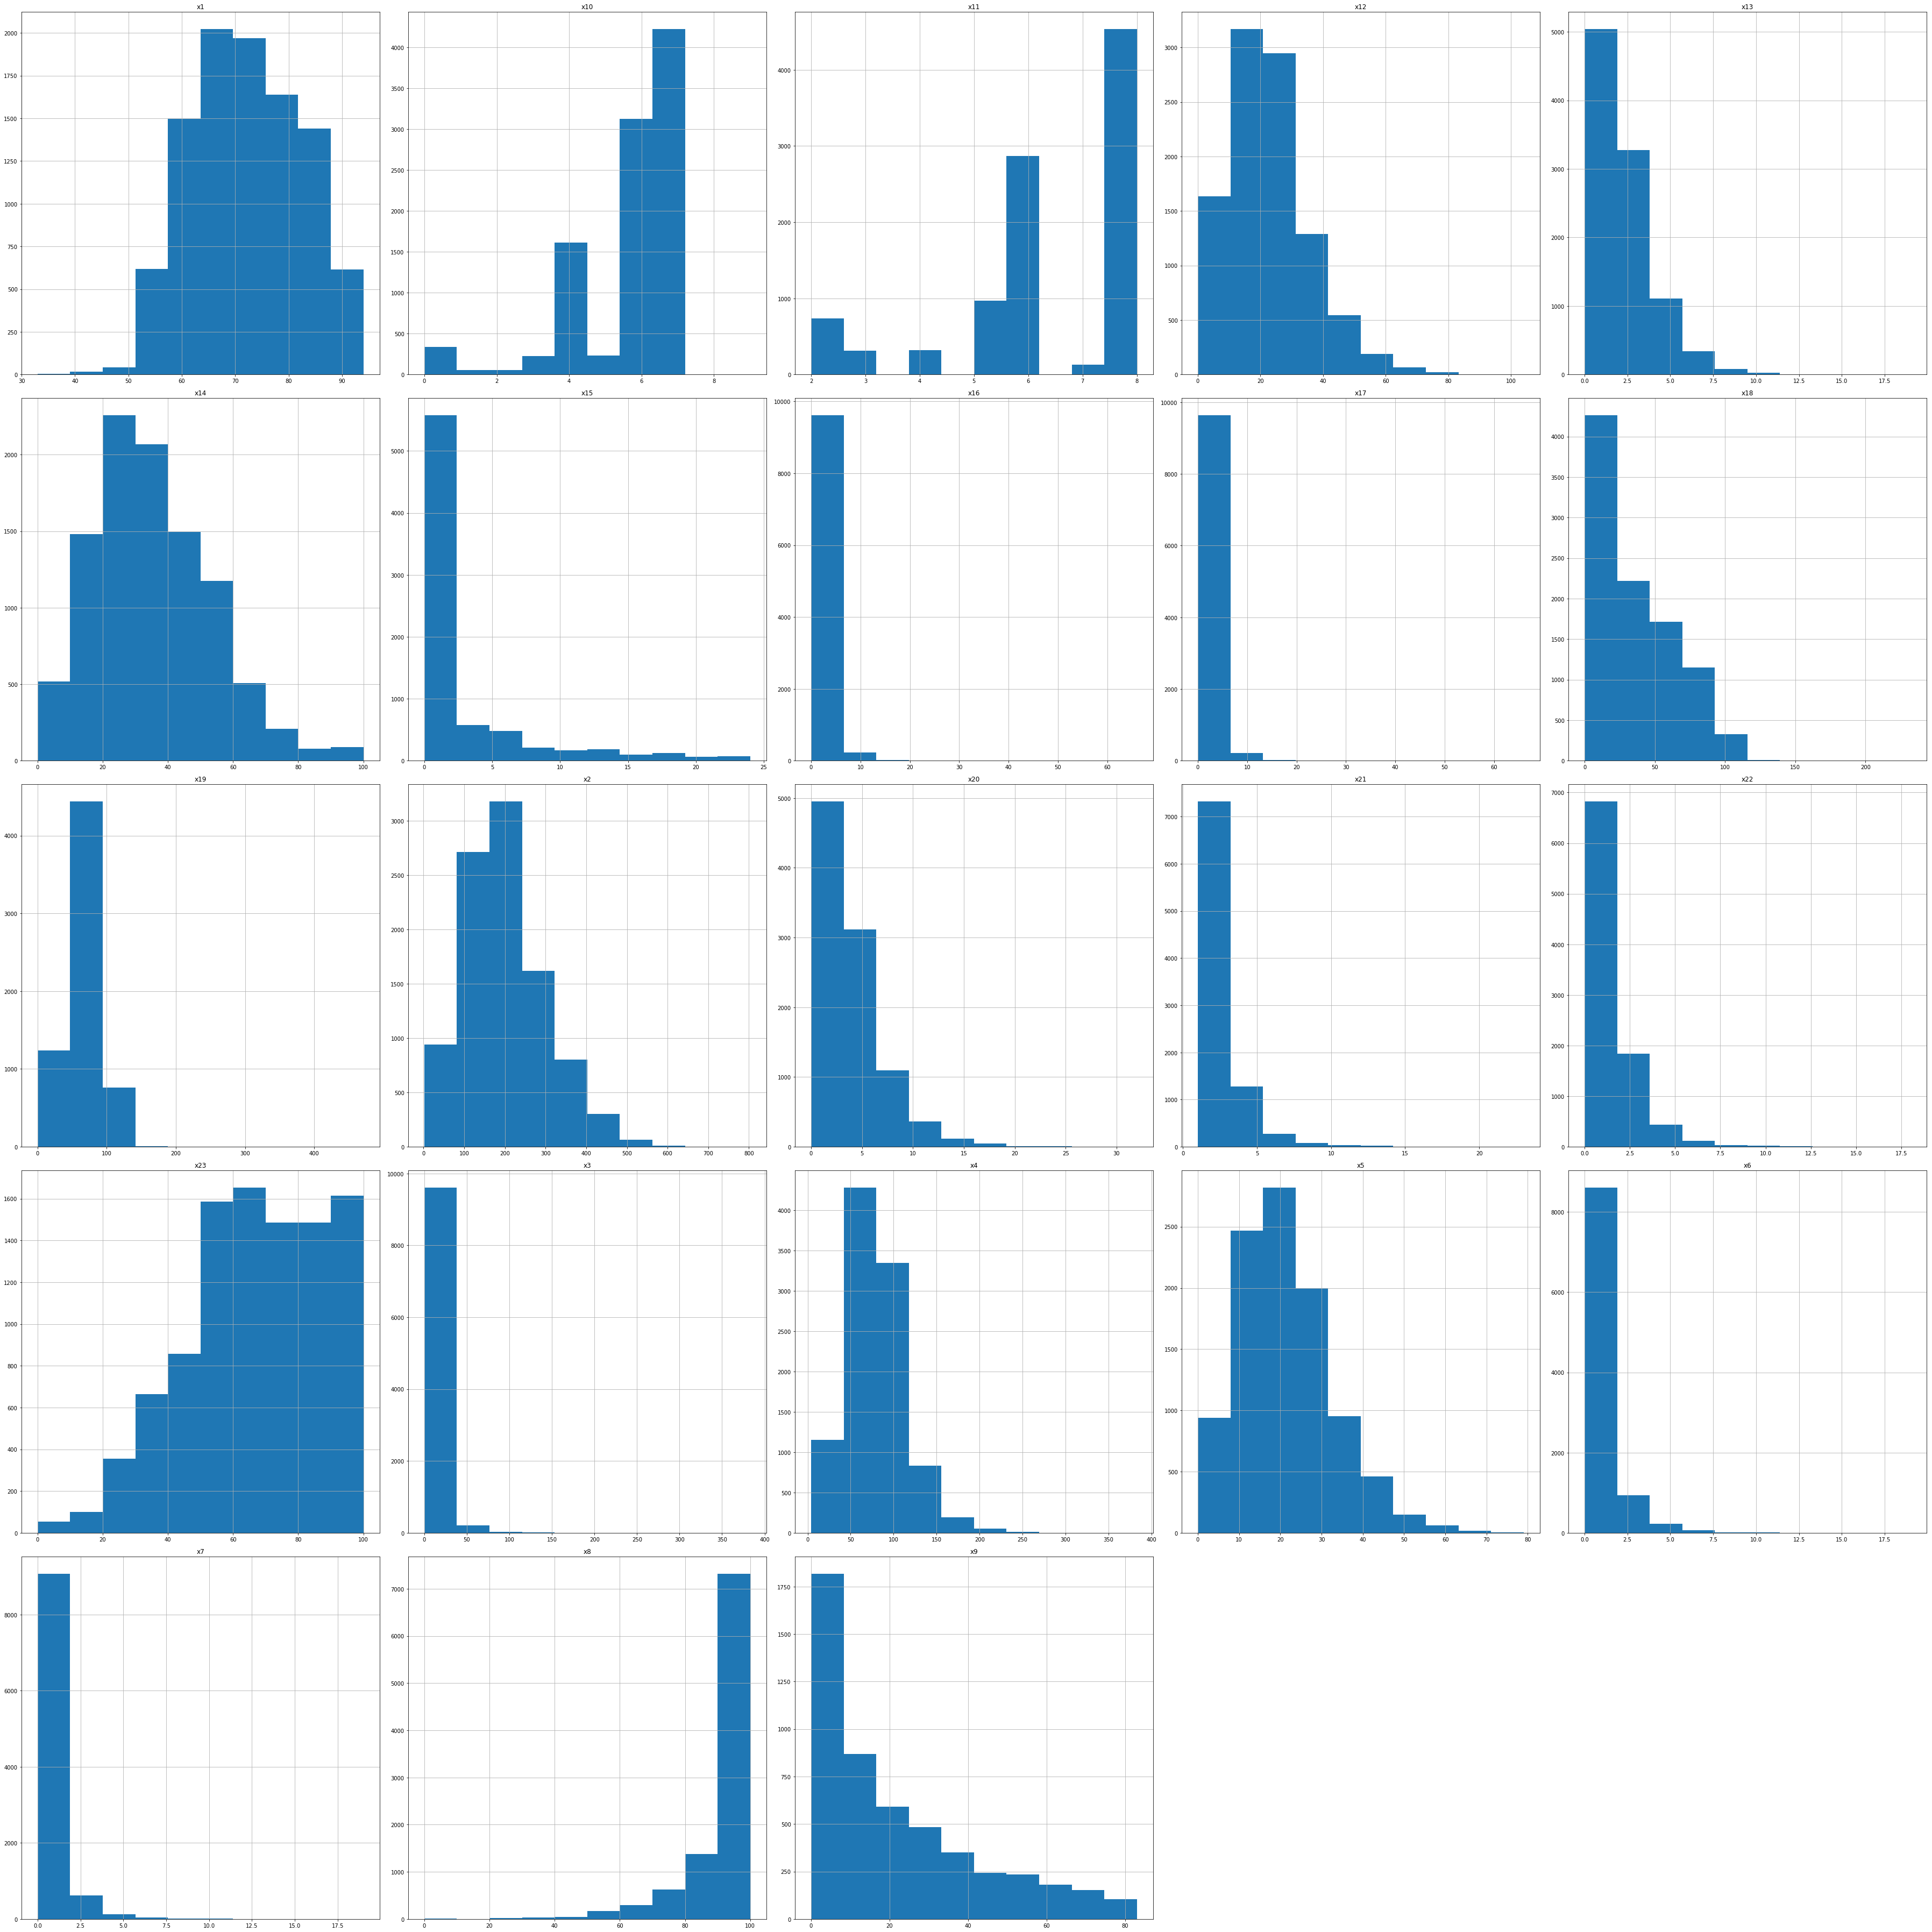

In [5]:
df.iloc[:,1:].hist(figsize=(50,50))
plt.tight_layout()

In [6]:
df['RiskFlag'].replace(('Good', 'Bad'), (1, 0), inplace=True)
df=df.fillna(df.mean())

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=20190019)
train.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
1577,1,64.0,120.0,6.0,49.0,15.0,1.0,1.0,88.0,25.000000,...,44.0,0.000000,1.0,1.0,69.0,81.000000,4.0,3.0,2.0,78.0
4847,0,58.0,139.0,16.0,87.0,14.0,1.0,0.0,75.0,2.000000,...,50.0,0.000000,2.0,2.0,84.0,68.537973,7.0,1.0,1.0,100.0
8699,0,56.0,126.0,15.0,66.0,22.0,2.0,2.0,86.0,0.000000,...,23.0,14.000000,0.0,0.0,21.0,60.000000,4.0,2.0,0.0,55.0
7494,0,63.0,315.0,3.0,96.0,45.0,1.0,1.0,98.0,6.000000,...,46.0,0.000000,2.0,2.0,41.0,67.000000,9.0,3.0,2.0,80.0
2585,0,83.0,50.0,15.0,27.0,8.0,0.0,0.0,100.0,21.879547,...,63.0,2.477719,1.0,1.0,10.0,90.000000,2.0,2.0,0.0,80.0


In [8]:
x_train, y_train = train.iloc[:,1:].values,train.iloc[:,0].values
x_test, y_test = test.iloc[:,1:].values, test.iloc[:,0].values

# Data Modeling
### Tree Methods

In [9]:
from sklearn import ensemble, tree
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from tqdm import tqdm

In [10]:

# codes modified from: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
MLA = [
    # ensemble methods
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    
    # tree  
    tree.DecisionTreeClassifier(),
    
    # xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(gpu_id=0),
]

In [11]:
# create table to compare MLA metrics
MLA_columns = ['Name', 'Parameters','Train AUC', 'Test AUC']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# record the results of machine learning algorithm
for i,alg in enumerate(tqdm(MLA)):
    alg.fit(x_train,y_train)
    
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[i, 'Name'] = MLA_name
    MLA_compare.loc[i, 'Parameters'] = str(alg.get_params())
    
    auc_train = roc_auc_score(y_train,alg.predict_proba(x_train)[:,1])
    auc_test = roc_auc_score(y_test,alg.predict_proba(x_test)[:,1])

    MLA_compare.loc[i, 'Train AUC'] = auc_train
    MLA_compare.loc[i, 'Test AUC'] = auc_test

MLA_compare.sort_values(by = ['Test AUC'], ascending = False, inplace = True)
MLA_compare

 17%|██████████████                                                                      | 1/6 [00:02<00:11,  2.29s/it]C:\Users\hadje\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.99s/it]


,Name,Parameters,Train AUC,Test AUC
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.830438,0.7924
5,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.827987,0.792174
2,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.803971,0.790438
0,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.995836,0.7597
1,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.996107,0.753758
4,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.998412,0.635061


I will use the Gradient Boosting Classifier, having the highest Test AUC, for further analysis.

In [12]:
MLA_compare.loc[3, 'Parameters']

"{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}"

In [13]:
from sklearn.metrics import accuracy_score

gb_clf = ensemble.GradientBoostingClassifier(presort='auto')
gb_clf.fit(x_train,y_train)

auc_train = roc_auc_score(y_train,gb_clf.predict_proba(x_train)[:,1])
auc_test = roc_auc_score(y_test,gb_clf.predict_proba(x_test)[:,1])

print("AUC Train:", auc_train.round(4))
print("AUC Test:", auc_test.round(4))
print("\nTraining Accuracy:", accuracy_score(y_train, gb_clf.predict(x_train)).round(4))
print("Testing Accuracy:", accuracy_score(y_test, gb_clf.predict(x_test)).round(4))

AUC Train: 0.8304
AUC Test: 0.7923

Training Accuracy: 0.749
Testing Accuracy: 0.7223


# Interpretability
#### SHAP

In [14]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(gb_clf)
shap_values = explainer.shap_values(x_train)

#### Force Plot

In [15]:
shap.force_plot(explainer.expected_value, shap_values[:500], x_train[:500],feature_names=var_names)

From the general force plot, two main factors are Consolidated version of risk makers and Net Fraction Revolving Burden.<br>
Force plot of individual sample can be made by as below, by changing the sample index value i.

In [16]:
i = 52 # sample index of a test set
shap.force_plot(explainer.expected_value, shap_values[i,:], x_test[i],feature_names=var_names)

#### Summary Plot

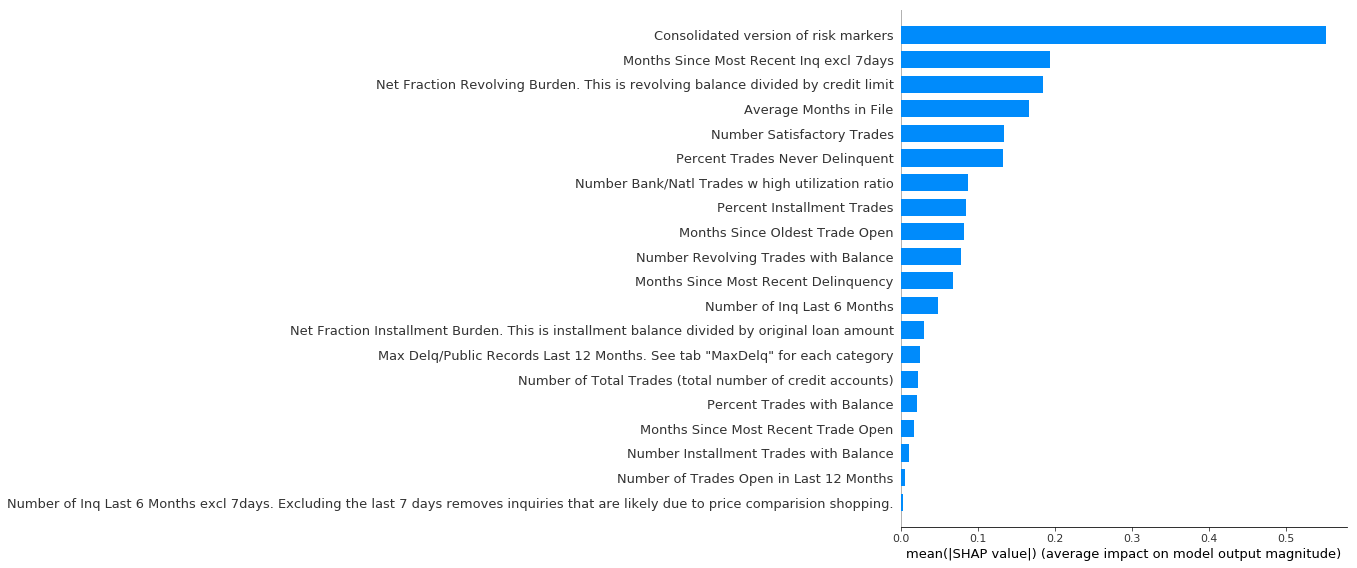

In [17]:
shap.summary_plot(shap_values, x_train, plot_type="bar", feature_names = var_names)

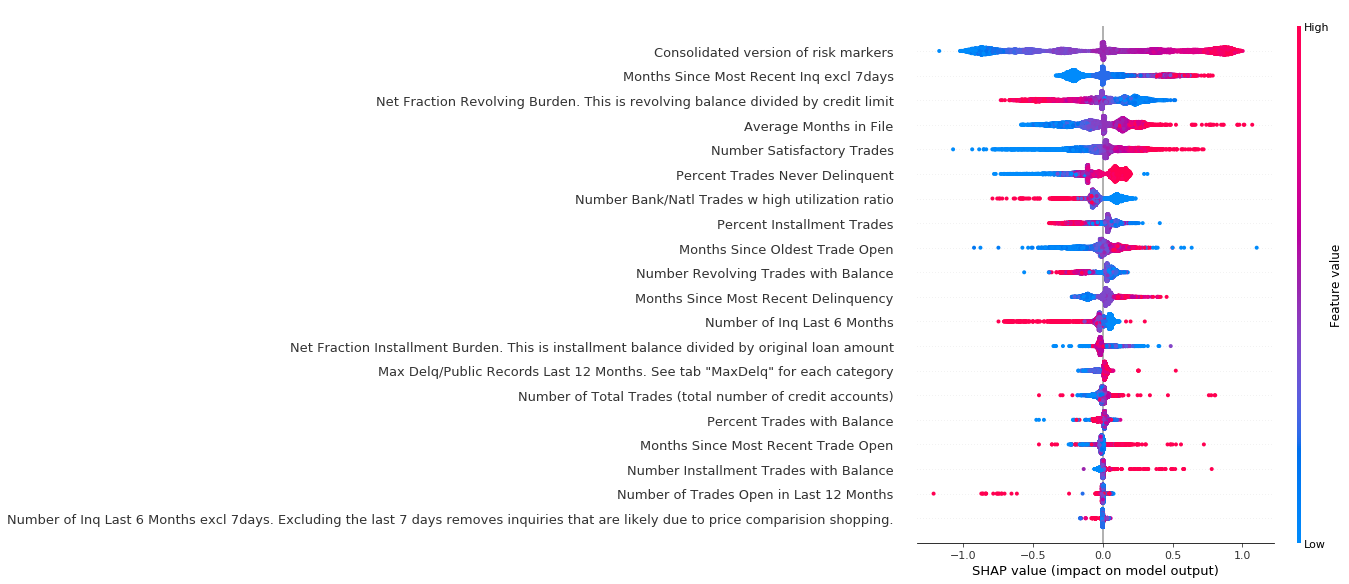

In [18]:
shap.summary_plot(shap_values, x_train, var_names)

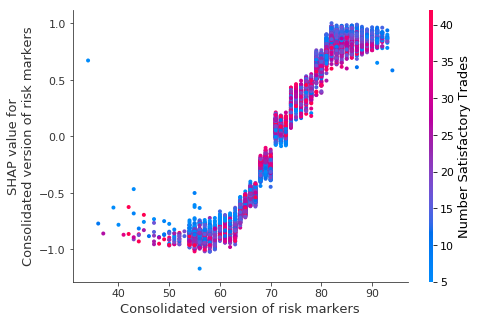

In [19]:
feature_id = 0
shap.dependence_plot(feature_id,shap_values, x_train, var_names)

Dependence plot shows the feature with index i and the variable interacts the most. For example, the above shows that the factor "Consoidlated version of risk markers" interacts with "Number Satisfactory Trades" the most, and their relationship.

#### LIME

In [20]:
import lime
import lime.lime_tabular

In [21]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train,
                                                  feature_names = var_names,
                                                  class_names=['Risk Flag'],
                                                  verbose = True,
                                                  mode = 'regression')

In [22]:
exp = explainer.explain_instance(x_test[52], gb_clf.predict,num_features=10)
exp.show_in_notebook(show_table=True)

Intercept 0.07440029107208584
Prediction_local [1.07266146]
Right: 1
